# EXPERIMENTOS ESTACIONES DISTANCIA MAYOR A 1KM

## Definiendo las variables necesarias

In [4]:
import os, re, urllib2
%matplotlib inline

from Utils import readAllStored_Rinex_Compri
from CodeProjectGNSS_wallas import plot_error, SimulacionRinex

dia1 = "287"
dian = "287"
ano = "2016"

Observable = "C1"
# Variables de la grafica
error_max = 100
resolucion_grafica = 100
ResolucionRinex = 15  #seg (BNGA, BEJA)


# Ubicacion de la Rinex local DB 
Rinex_dataBase      = os.getcwd() +"/" + "new_data"
Simu_Folder         = os.getcwd() +"/" + "Simul_data"

## Definiendo la pareja de estaciones para el escenario de simulacion

In [5]:
# agregando nuevos pares de estaciones (que no estan en el kmz)
parejas_kmz = {}
parejas_kmz[1] = ('BNGA', 'BEJA')

## Iniciando proceso de simulacion

In [6]:
## Leer los rinex almacenado en mi equipo
RinexDB             = readAllStored_Rinex_Compri(Rinex_dataBase, parejas_kmz)

## Iniciando la simulacion
Resultados, DistCalc = SimulacionRinex(Observable, error_max, resolucion_grafica, Simu_Folder, parejas_kmz, RinexDB, dia1, dian, ano)

	 [Pareja de estaciones] 	 [dia GPS] 		 [RESULTADO]

	 ('BNGA', 'BEJA') 		 287 		 ✔  Iniciando ejecucion


CodeProjectGNSS_wallas.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sum(a)/b
CodeProjectGNSS_wallas.py:111: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum((a-b)**2)/(c-1))
CodeProjectGNSS_wallas.py:205: OptimizeWarning: Unknown solver options: xtol
  rm = minimize(f, x, method="SLSQP", options={'disp': False, 'ftol':1e-12, 'xtol':0.0001}) # SLSQP, BFGS, Nelder-Mead
/home/zenbook/anaconda3/envs/py27/lib/python2.7/site-packages/nvector/_core.py:626: RuntimeWarning: divide by zero encountered in true_divide
  height = (k + e_2 - 1) / k * sqrt(d**2 + p_EB_E[0, :]**2)
/home/zenbook/anaconda3/envs/py27/lib/python2.7/site-packages/nvector/_core.py:626: RuntimeWarning: invalid value encountered in multiply
  height = (k + e_2 - 1) / k * sqrt(d**2 + p_EB_E[0, :]**2)
/home/zenbook/anaconda3/envs/py27/lib/python2.7/site-packages/nvector/_core.py:628: RuntimeWarning: divide by zero encountered in true_divide
  temp = 1. / sqrt(d**2 + p

rm -r /media/DATOS/Mi_Home/Dropbox/Maestria/Libro-Grado/Notebooks/Simul_data


## Presentando resultados

/home/zenbook/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


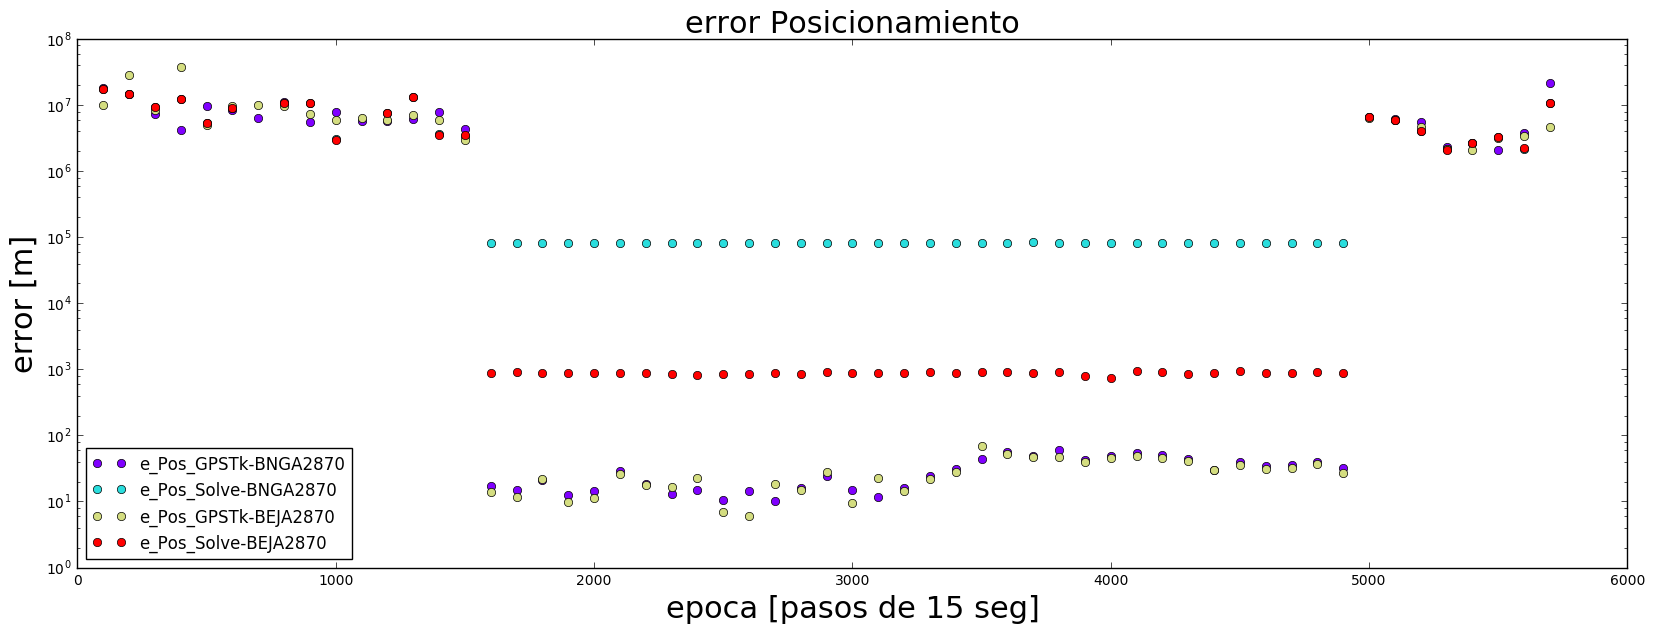

In [7]:
titulo = "error Posicionamiento"
xlabel = "epoca [pasos de "+ str(ResolucionRinex)+ " seg]"
ylabel = "error [m]"
size_fig = (20,15)

plot_error(Resultados, titulo, xlabel, ylabel, size_fig)

# EXPERIMENTOS ESTACIONES DISTANCIA MENOR A 1KM

## Definiendo la pareja de estaciones para el escenario de simulacion

In [8]:
# agregando nuevos pares de estaciones (que no estan en el kmz)
parejas_kmz = {}
parejas_kmz[1] = ('TGMX', 'UNPM')

## Iniciando la simulacion

In [10]:
## Leer los rinex almacenado en mi equipo
RinexDB             = readAllStored_Rinex_Compri(Rinex_dataBase, parejas_kmz)

## Iniciando la simulacion
Resultados, DistCalc = SimulacionRinex(Observable, error_max, resolucion_grafica, Simu_Folder, parejas_kmz, RinexDB, dia1, dian, ano)

	 [Pareja de estaciones] 	 [dia GPS] 		 [RESULTADO]

	 ('TGMX', 'UNPM') 		 287 		 ✔  Iniciando ejecucion
rm -r /media/DATOS/Mi_Home/Dropbox/Maestria/Libro-Grado/Notebooks/Simul_data


## Presentando los resultados

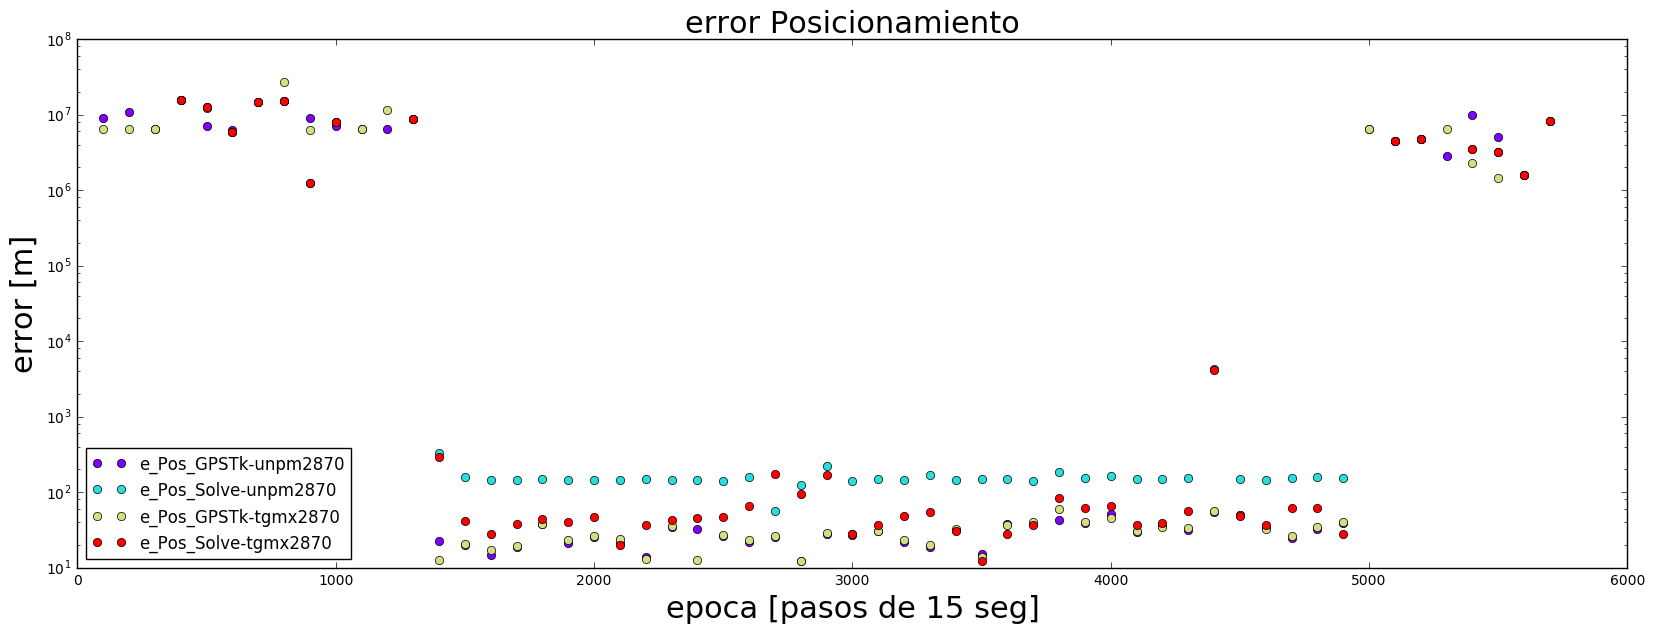

In [11]:
titulo = "error Posicionamiento"
xlabel = "epoca [pasos de "+ str(ResolucionRinex)+ " seg]"
ylabel = "error [m]"
size_fig = (20,15)

plot_error(Resultados, titulo, xlabel, ylabel, size_fig)

hasta este punto se confirma el comentario de nuestra ultima reuníon ** distancias grandes ** podrían verse influenciadas por mayores fuentes de error afectando la precision, ademas provocan un problema de convergencia en el algoritmo que soluciona el sistema de ecuanciones no lineal.

Adicionalmente la suposicion de que el error en la distancia estimada por GPSTk y el metodo Solver (propuesto) estan correlacionados, toma fuerza para estaciones con menor separacion.

Del comportamiento del error en posicionamiento obtenido a partir de GPSTk creo que es el mi proximo paso a seguir, para tratar de plantear un modelo de correlacion entre ese error en posicionamiento de la estacion y el retraso de la ionosfera o quizas la variacion en la distancia estimada entre los receptores, de forma que ese modelo de correlacion permita tener una idea de que variables podrían anexarse al sistema de ecuaciones actual.

# AHORA REALIZANDO UN BARRIDO POR VARIAS ESTACIONES (menos de 1 KM distancia)

 ## Definiendo la pareja de estaciones para el escenario de simulacion

In [14]:
from Utils import get_data_stations, descarga_Rinex_Compri, readAllStored_Rinex_Compri
from CodeProjectGNSS_wallas import plot_error, SimulacionRinex


dia1 = "010"
dian = "010"
ano = "2016"


parejas_kmz        = get_data_stations("sites.kmz", 1e3)
print parejas_kmz

100000000.0 637.087679385 entre BARA y TGDR
637.087679385 224.572580106 entre JME2 y JMEL
224.572580106 142.344182101 entre TGMX y UNPM
{0: ('BARA', 'TGDR'), 1: ('JME2', 'JMEL'), 2: ('TGMX', 'UNPM')}


## Ejecutando la simulacion

In [15]:
## Leer los rinex almacenado en mi equipo
RinexDB             = readAllStored_Rinex_Compri(Rinex_dataBase, parejas_kmz)

# Carga todos los rines que hay en el folder 
#RinexDB = descarga_Rinex_Compri(Rinex_dataBase, parejas_kmz, dia1, dian, ano)


## Iniciando la simulacion
Resultados, DistCalc = SimulacionRinex(Observable, error_max, resolucion_grafica, Simu_Folder, parejas_kmz, RinexDB, dia1, dian, ano)

	 [Pareja de estaciones] 	 [dia GPS] 		 [RESULTADO]

	 ('BARA', 'TGDR') 		 010 		 ✔  Iniciando ejecucion
	 ('JME2', 'JMEL') 		 010 		 ✘  Cancelando ejecucion (No existen Rinex para [('JME2', 'JMEL')])
	 ('TGMX', 'UNPM') 		 010 		 ✔  Iniciando ejecucion
rm -r /media/DATOS/Mi_Home/Dropbox/Maestria/Libro-Grado/Notebooks/Simul_data


## Presentando los resultados

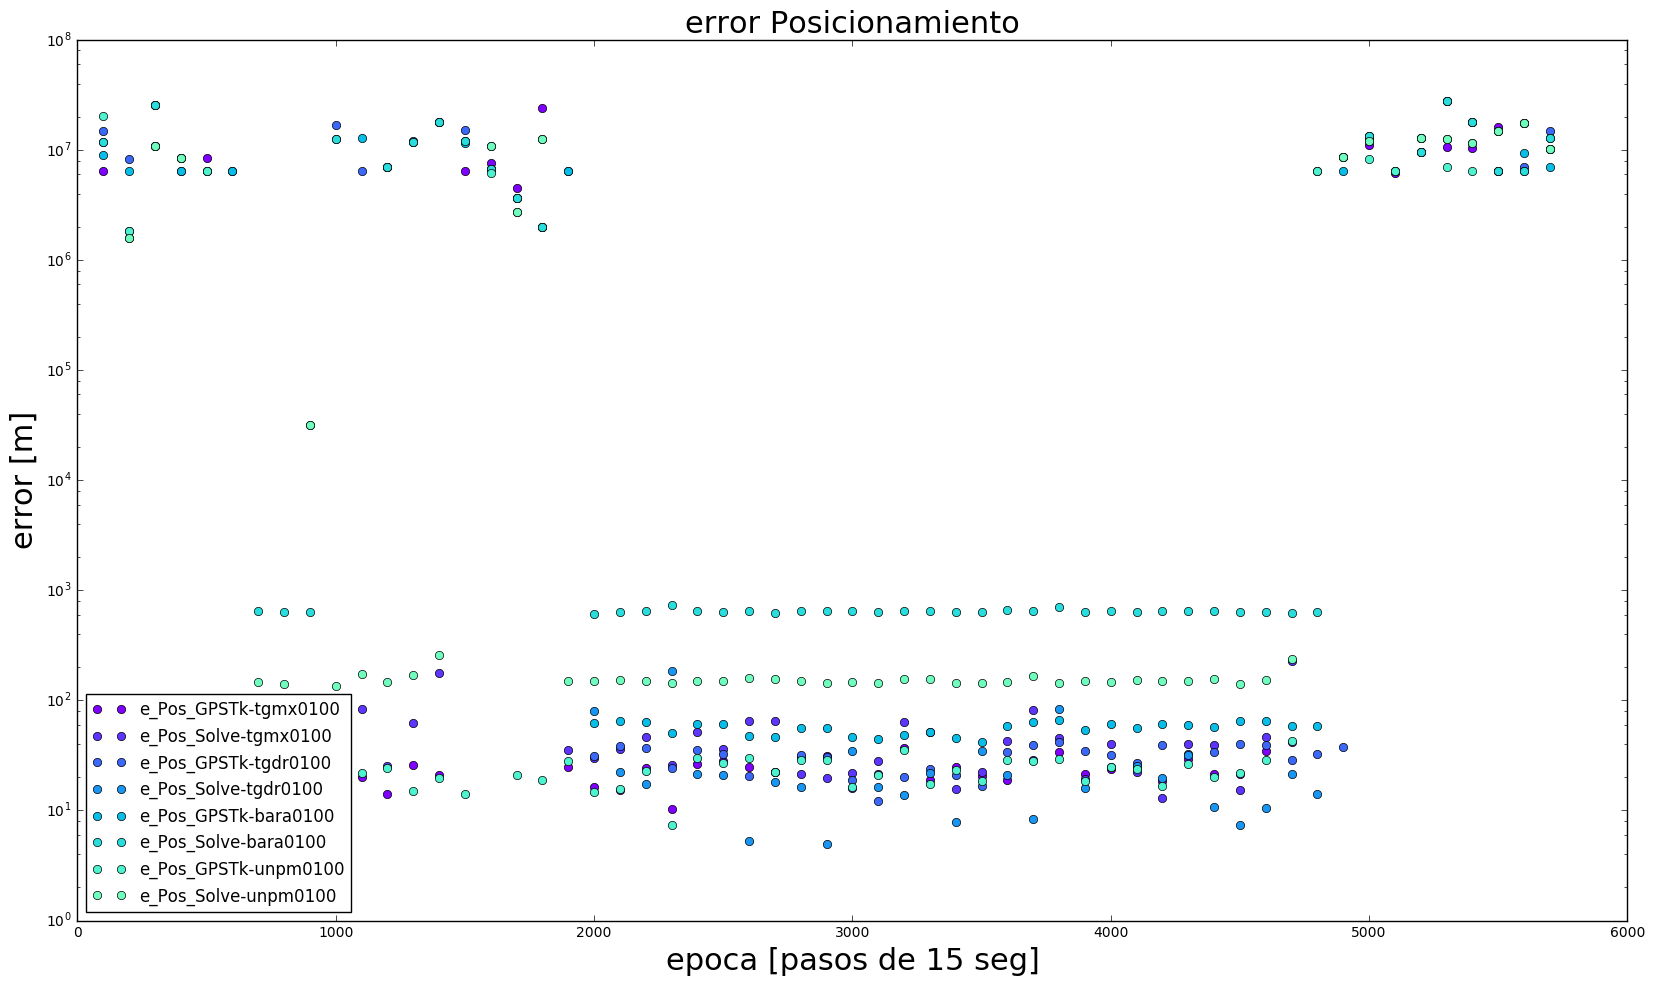

In [16]:
titulo = "error Posicionamiento"
xlabel = "epoca [pasos de "+ str(ResolucionRinex)+ " seg]"
ylabel = "error [m]"
size_fig = (20, 25)

plot_error(Resultados, titulo, xlabel, ylabel, size_fig)